**Grupo: Eduardo Menezes, Luiz Leão, Matheus Maranhão, Thiago Kramer, Tulio Farias**

# Bibliotecas fundamentais

In [ ]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

A base de dados escolhida foi a relação de pessoas vacinadas em Recife, de autoria da Secretaria de Saúde de Recife. Fora identificação do cidadão, a base contém informações de tipo e lote da vacina, dose ministrada, e local de aplicação.

Fonte: http://dados.recife.pe.gov.br/dataset/relacao-de-pessoas-vacinadas-covid-19

Analisando essa base de dados, é possível estudar o progresso da vacinação em Recife. Adicionalmente, pode-se identificar diferenças na cobertura vacinal de determinados grupos, sob critérios como gênero e idade.

In [ ]:
# Código que importa dados diretamente da base

url = 'http://dados.recife.pe.gov.br/dataset/f381d9ea-4839-44a6-b4fe-788239189900/resource/966e9c4c-df45-40d7-9c58-2f13c61a6d28/download/vacinados.csv'

df = pd.read_csv(url, sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407298 entries, 0 to 3407297
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cpf              object 
 1   nome             object 
 2   sexo             object 
 3   grupo            object 
 4   vacina           object 
 5   lote             object 
 6   dose             float64
 7   data_vacinacao   object 
 8   local_vacinacao  object 
dtypes: float64(1), object(8)
memory usage: 234.0+ MB


In [ ]:
# Selecionando amostra de 1500 linhas
vac = df.sample(n=1500, random_state=2)

vac.head(5)

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
801552,***.623.084-**,EDSON FERNANDO MOSCOSO DE FRANÇA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FG3528,3.0,2021-09-27,CENTRO DE VACINAÇÃO GERALDÃO
2529590,***.270.604-**,MICHELL ANDRADE LIMEIRA,MASCULINO,PÚBLICO EM GERAL (18 a 59 anos),3 - COMIRNATY (PFIZER),FM2967,3.0,2022-01-29,SESAU - BUSCA ATIVA
1282059,***.431.654-**,INALDO JOSÉ DE LIMA,MASCULINO,PÚBLICO EM GERAL (18 a 59 anos),2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD014VA,1.0,2021-07-31,DRIVE THRU - DNOCS
2737190,***.499.024-**,POLYANA GOMES LIRA SATURNINO,FEMININO,PÚBLICO EM GERAL (18 a 59 anos),2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),210198,1.0,2021-07-30,CENTRO DE VACINAÇÃO PARQUE DA MACAXEIRA
2463568,***.978.504-**,MARLENE DA SILVA RAIMUNDO,FEMININO,PÚBLICO EM GERAL (18 a 59 anos),3 - COMIRNATY (PFIZER),EY0586,1.0,2021-07-13,CENTRO DE VACINAÇÃO UPAE IBURA


In [ ]:
# Valores nulos
vac.isnull().sum()

cpf                4
nome               0
sexo               0
grupo              0
vacina             0
lote               0
dose               0
data_vacinacao     0
local_vacinacao    0
dtype: int64

In [ ]:
# Número de valores unicos
vac.nunique()

cpf                1487
nome               1496
sexo                  3
grupo                21
vacina                6
lote                127
dose                  4
data_vacinacao      364
local_vacinacao      75
dtype: int64

In [ ]:
# Transformando coluna com o mês de vacinação em datetime

vac['data_vacinacao'] = pd.to_datetime(vac['data_vacinacao'])

In [ ]:
# Criando coluna com o mês de vacinação, para reduzir a qtd de informações na coluna 'data_vacinacao'
def ano_mes(data):
    return re.search("(\d+\-\d+)\-\d+", str(data)).group(1)

vac['mes_vacina']= vac.data_vacinacao.apply(ano_mes)

In [ ]:
#Unificando colunas com erros de digitação
vac.grupo.replace(' PÚBLICO EM GERAL - MENOR DE 18 ANOS', 
                  'PÚBLICO EM GERAL - MENOR DE 18 ANOS', inplace=True)

In [ ]:
# Eliminando as linhas que apresentam algum valor nulo
vac.dropna(inplace=True)
vac.isnull().sum()

cpf                0
nome               0
sexo               0
grupo              0
vacina             0
lote               0
dose               0
data_vacinacao     0
local_vacinacao    0
mes_vacina         0
dtype: int64

# Visualizando rapidamente os dados

In [ ]:
# Feature Statistics

vac.sort_values(by='data_vacinacao', inplace=True)
doses = vac.groupby('data_vacinacao').count().cumsum()

dose1 = vac.loc[vac['dose'] == 1]
dose1 = dose1.groupby('data_vacinacao').count().cumsum()

## Gráficos para visualização

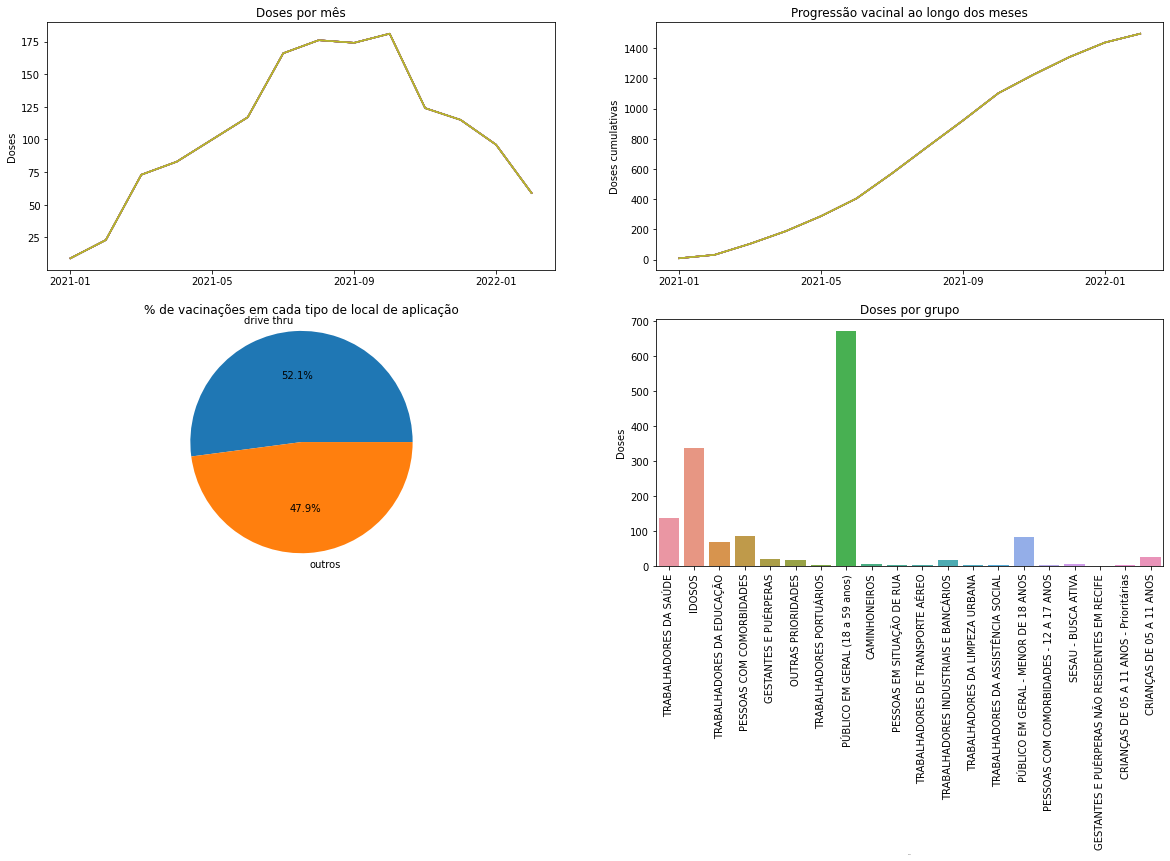

In [ ]:
# Visualização de Dados

#1. Vacinas aplicadas por mês

fig, axs = plt.subplots(2, 2, figsize = (20,10))

vac.sort_values(by='mes_vacina', inplace=True)
mes = vac.groupby('mes_vacina').count()

axs[0, 0].plot(mes)
axs[0, 0].set_title('Doses por mês')
axs[0, 0].set_ylabel('Doses')
axs[0,0].set_xticks(axs[0,0].get_xticks()[::4])

# 2. Progressão temporal de indivíduos vacinados;

vac.sort_values(by='mes_vacina', inplace=True)
data = vac.groupby('mes_vacina').count().cumsum()
axs[0,1].plot(data)
axs[0,1].set_title('Progressão vacinal ao longo dos meses')
axs[0,1].ticklabel_format(style='plain', axis='y')
axs[0,1].set_ylabel('Doses cumulativas')
axs[0,1].set_xticks(axs[0,1].get_xticks()[::4])

# 3. Locais de vacinação mais frequentes;
vac.loc[vac["local_vacinacao"].str.contains("drive", case=False), "local_vacinacao"]="drive thru"
vac.loc[vac["local_vacinacao"]!="drive thru", "local_vacinacao"]="outros"
vac["local_vacinacao"].value_counts()

pizza_grupos = vac.groupby("local_vacinacao").size()
axs[1,0].pie(pizza_grupos, labels=pizza_grupos.index, autopct='%1.1f%%')
axs[1,0].set_ylabel("")
axs[1,0].set_title("% de vacinações em cada tipo de local de aplicação")
axs[1,0].axis('equal')

# 4. Grupos de vacinação mais frequentes;

vac1 = vac.copy()
axs[1,1] = sns.countplot(x="grupo", data=vac1)
axs[1,1].set(title='Doses por grupo', ylabel='Doses')
axs[1,1].set_xlabel("Grupos", fontsize=1)
axs[1,1].tick_params(axis='x', rotation=90)

## Quantidade de doses por mês  
Nota-se que as vacinações tiveram seu pico em outubro de 2021, no começo do quarto trimestre, mas ele foi seguido por uma queda vertiginosa no mês seguinte e seguiu em queda nos meses posteriores. O terceiro trimestre de 2021 foi o único com vacinações consistentemente altas, acima de 150 doses por mês na amostra considerada.

## Doses cumulativas no período  
Confirma-se novamente uma redução na quantidade de doses aplicadas em cada mês a partir de novembro de 2021. O começo do ritmo mais intenso de vacinação é perceptível a partir de junho de 2021, final do segundo trimestre.

## Local de aplicação  
Considerando todos os locais possíveis de aplicação, as opções de drive-thru foram majoritárias. Mais de 50% das vacinações ocorreram nesta modalidade, demonstrando uma grande importância do modelo e uma possível preferência da população por ele.

## Doses por grupo  
O público geral de 18 a 59 anos representou, como era de se esperar, a vasta maioria dos vacinados, alcançando aproximadamente 700 doses, pouco abaixo da metade das doses da amostra. Os idosos foram o segundo grupo mais numeroso, alcançando aproximadamente 350 doses, ou pouco menos de um quarto das doses totais. O terceiro grupo mais vacinado foi o dos trabalhadores de saúde, com aproximadamente 150 doses, que correspondem a 10% da amostra.

# Insights sobre a Base de Dados

## 1. Existe alguma correlação do tipo de vacina vs. o grupo do individuo?  
(Exemplo: moradores de rua tomaram um tipo específico de vacina?)

In [ ]:
# O código comentado abaixo funcionou em um Jupyter notebook, mas deixou de funcionar no Colab.
# Favor considerar o gráfico feito no Seaborn.

#plt.figure(figsize=(12,8))

#vacG1 = vac.copy()
#vacG1['grupo'] = vacG1['grupo'].str.replace(' ', '\n')
#data = vacG1.groupby('grupo')['vacina'].value_counts(normalize=True)

#plt.bar(data, height=1)
#plt.legend(loc='upper right', title='Vacina')
#plt.xticks(rotation=0)

"\nplt.figure(figsize=(12,8))\n\nvacG1 = vac.copy()\nvacG1['grupo'] = vacG1['grupo'].str.replace(' ', '\n')\ndata = vacG1.groupby('grupo')['vacina'].value_counts(normalize=True)\n\nplt.bar(data, height=1)\nplt.legend(loc='upper right', title='Vacina')\nplt.xticks(rotation=0)\n"

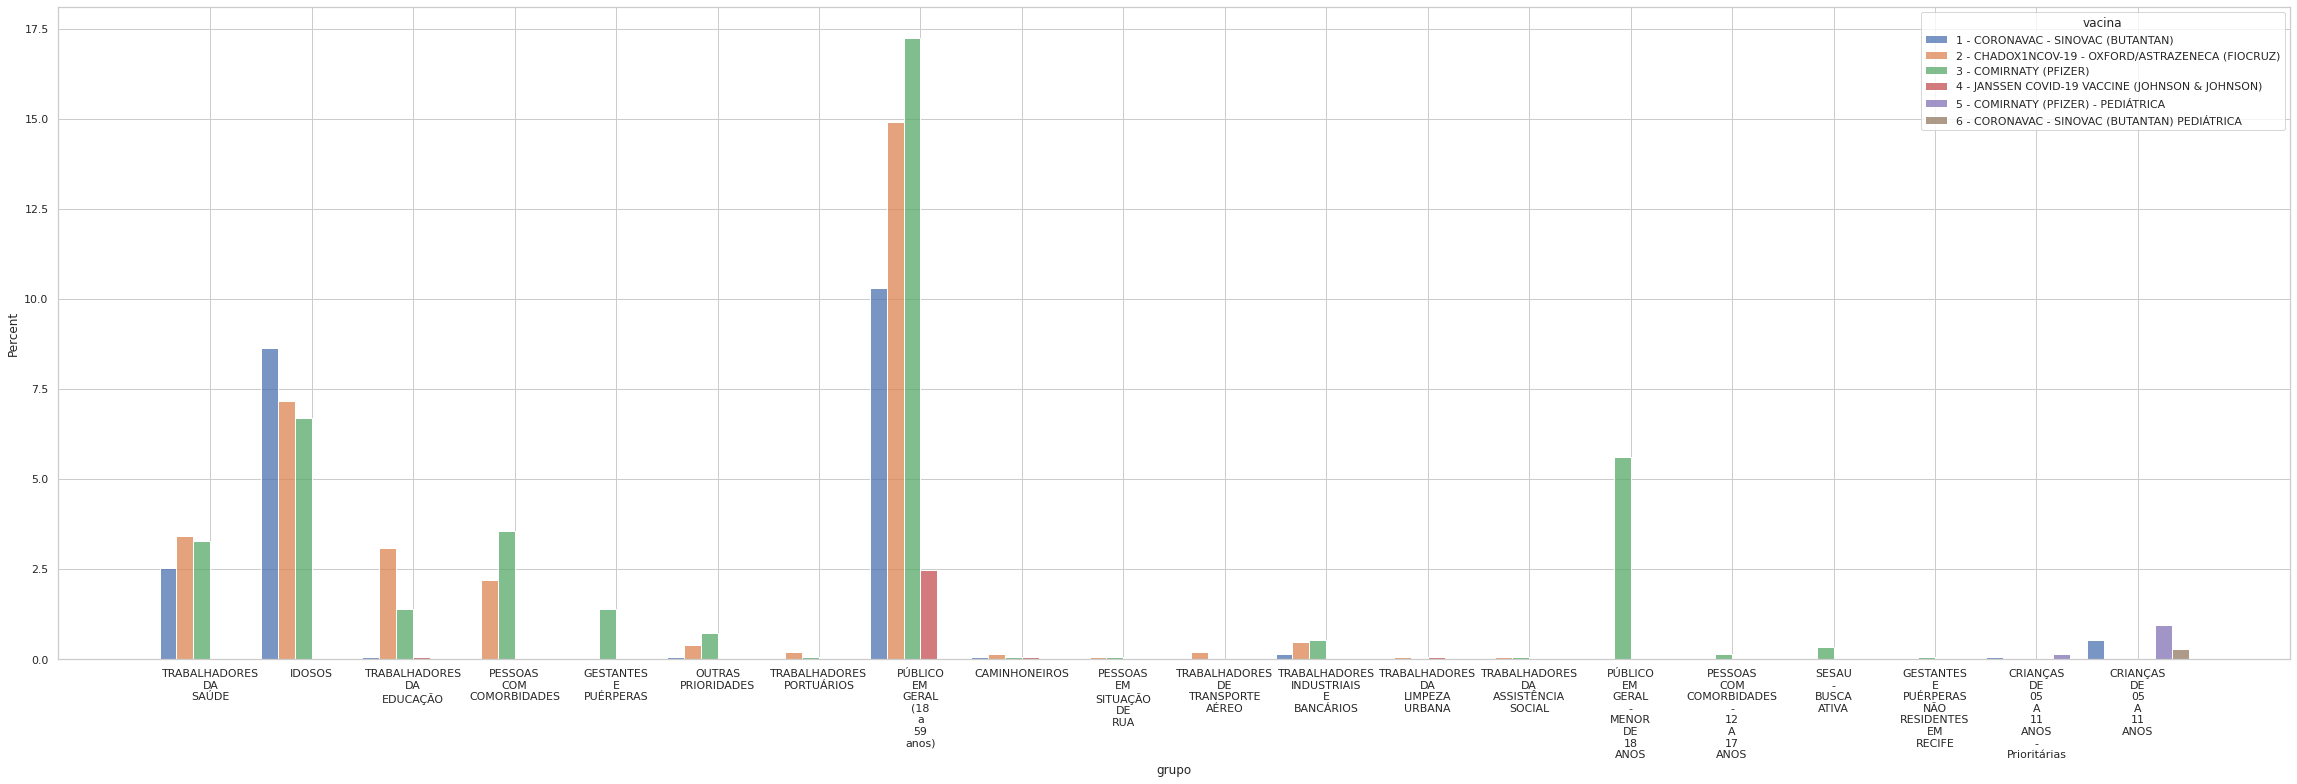

In [ ]:
vacG1 = vac.copy()
vacG1['grupo'] = vacG1['grupo'].str.replace(' ', '\n')

sns.set_theme(style="whitegrid")
ax = sns.histplot(data=vacG1, x='grupo', hue='vacina', multiple='dodge', stat='percent')

A Pfizer e a Astrazeneca foram as vacinas mais aplicadas largamente na população. Entre gestantes e pessoas com comorbidades, a Pfizer foi significativamente mais aplicada do que a Astrazeneca. Já em trabalhadores da educação e caminhoneiros, a Astrazeneca foi mais expressiva. No entanto, nos casos específicos dos trabalhadores de saúde, houve um equilíbrio entre elas e a Coronavac, e no caso dos idosos, a Coronavac teve uma frequência levemente maior. A vacina Janssen não foi particularmente significativa em nenhum grupo da amostra.
  
Entre as doses pediátricas, a Pfizer foi a mais utilizada, mas também houve uma participação considerável da dose padrão da Coronavac. A Coronavac pediátrica não se mostrou particularmente considerável em número de doses na amostra.

## 2. Existe alguma tipo de relação do tipo de vacina vs. quando ela foi administrada?  
(Exemplo: as vacinas administradas mudaram ao longo do tempo?)

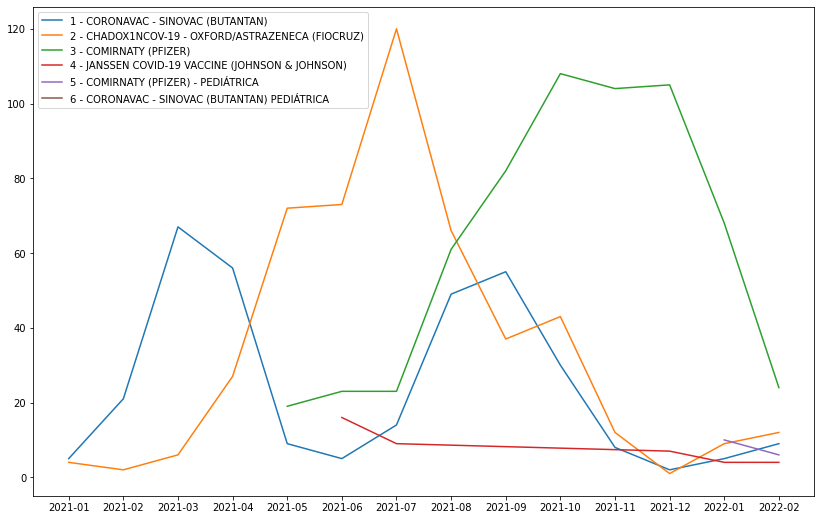

In [ ]:
plt.figure(figsize=(14,9))

vac.sort_values(by='mes_vacina', inplace=True)
data = vac.groupby(['vacina','mes_vacina']).count()['grupo']

index = data.index.unique(level='vacina')

for i in index:
    plt.plot(data[i])

plt.legend(index)

A Coronavac foi a vacina com maior número de aplicações ao longo dos 4 primeiros meses de vacinação, possívelmente por ter sido uma vacina desenvolvido em parceria com o instituto Buntantan, o que facilitou o acesso. Acontecem 2 picos de aplicação, que podem ter relação com as aplicações de primeira e segunda doses.


A partir do 5º mês a Astrazeneca passou a ser o tipo de vacina mais aplicada.


Nos primeiros meses de 2022, a Pfizer é a vacina mais aplicada. Tendo em vista que a 3º está sendo feita com vacinas não aplicadas anteriormente, faz sentido que haja essa substituição no tipo de vacina.

## 3. Existe alguma relação da progressão temporal da vacinação com o sexo?  
(Exemplo: mulheres se vacinaram antes dos homens?)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


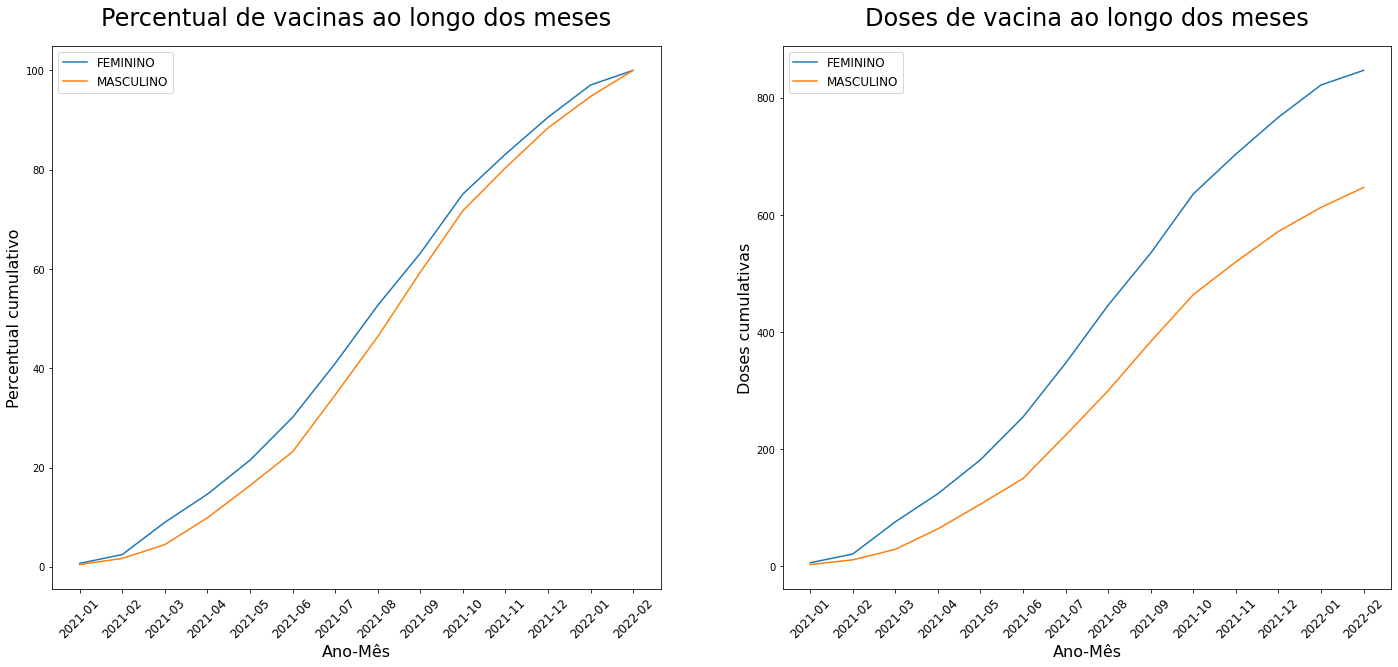

In [ ]:
vac.sort_values(by='mes_vacina', inplace=True)
labelMeses=vac['mes_vacina'].unique()
data = vac.groupby(['sexo','mes_vacina']).count()['grupo'].sort_index(ascending=False)
maxFem = vac.groupby('sexo').count()['grupo'].loc['FEMININO']
maxMasc = vac.groupby('sexo').count()['grupo'].loc['MASCULINO']
data = data.drop('OUTROS',axis=0)
data = data.reindex(data.index[::-1])

index = data.index.unique(level='sexo')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,10))

ax1.plot((data['FEMININO'].cumsum()/maxFem)*100)
ax1.plot((data['MASCULINO'].cumsum()/maxMasc)*100)
ax1.set_title('Percentual de vacinas ao longo dos meses', fontsize=24, pad=20)
ax1.set_xlabel('Ano-Mês', fontsize=16)
ax1.set_ylabel('Percentual cumulativo', fontsize=16)
ax1.set_xticklabels(labelMeses, fontsize=12, rotation=45)
ax1.legend(index, fontsize=12)

ax2.plot(data['FEMININO'].cumsum())
ax2.plot(data['MASCULINO'].cumsum())
ax2.set_title('Doses de vacina ao longo dos meses', fontsize=24, pad=20)
ax2.set_xlabel('Ano-Mês', fontsize=16)
ax2.set_ylabel('Doses cumulativas', fontsize=16)
ax2.set_xticklabels(labelMeses, fontsize=12, rotation=45)
ax2.legend(index, fontsize=12)

plt.show()

A análise não demonstra uma diferença particularmente significativa na velocidade de vacinação, mas sugere uma possível tendência para as mulheres se vacinarem mais rápido. Apesar de haver um contingente maior de mulheres na amostra, elas alcançaram 100% de vacinação antes dos homens, e por isso também estiveram acima em números absolutos. Porém, em termos proporcionais, não foi percebida uma diferença gritante, apesar da tendência estar perceptível.  
  
Também havia uma categoria 'OUTROS', contemplando expressões e identidades de gênero não-binárias. No entanto, como a amostra possuía dados de apenas dois meses para essa categoria e poucos elementos, ela foi removida desta análise. Análises futuras poderiam investigar esse grupo em particular para melhor compreendê-los.